In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import calendar
%matplotlib inline

In [117]:
df = pd.read_csv('Sales_pred.csv',',')
df['Профит'] = df['СуммаПродажи'] - df['Себестоимость']
df['ДатаПродажи'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m, d in zip(df['Год'], df['Месяц'], df['День'])])
df.set_index('ДатаПродажи', inplace=True)
df['ДеньНедели'] = df.index.weekday
df['Сезон'] = (df['Месяц']%12 + 3)//3
df.head()

,Год,ТоварКод,ПроизводительКод,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,Профит,ДеньНедели,Сезон
ДатаПродажи,,,,,,,,,,,,
2017-03-09,2017,145530,3035,1.320,52.50,41.57,3,9,11,10.93,3,2
2015-05-28,2015,33793,429,11.000,302.50,231.00,5,28,22,71.50,3,2
2018-07-26,2018,96625,3035,7.176,480.59,351.62,7,26,30,128.97,3,3
2016-10-14,2016,225573,2695,1.000,98.89,65.00,10,14,42,33.89,4,4
2014-10-12,2014,222494,9,2.000,52.00,39.60,10,12,41,12.40,6,4


In [90]:
df['ТоварКод'].value_counts().head()

33793    1768
84543    1741
85009    1735
33791    1724
84555    1714
Name: ТоварКод, dtype: int64

* 8048 Арбуз Казахстан 
* 33793 Хлеб белый пшеничный 1с 500г Дан-1

In [118]:
df_filter = df['ТоварКод'].isin(["8048"])
df = df[df_filter]
df.head()

,Год,ТоварКод,ПроизводительКод,Количество,СуммаПродажи,Себестоимость,Месяц,День,Неделя,Профит,ДеньНедели,Сезон
ДатаПродажи,,,,,,,,,,,,
2016-08-23,2016,8048,4711,3.988,119.20,87.74,8,23,35,31.46,1,3
2014-07-30,2014,8048,4711,5.220,242.50,187.62,7,30,31,54.88,2,3
2014-07-23,2014,8048,4711,2.038,94.50,73.25,7,23,30,21.25,2,3
2015-07-26,2015,8048,4711,10.469,549.51,450.17,7,26,30,99.34,6,3
2018-07-15,2018,8048,4711,9.504,579.00,453.15,7,15,28,125.85,6,3


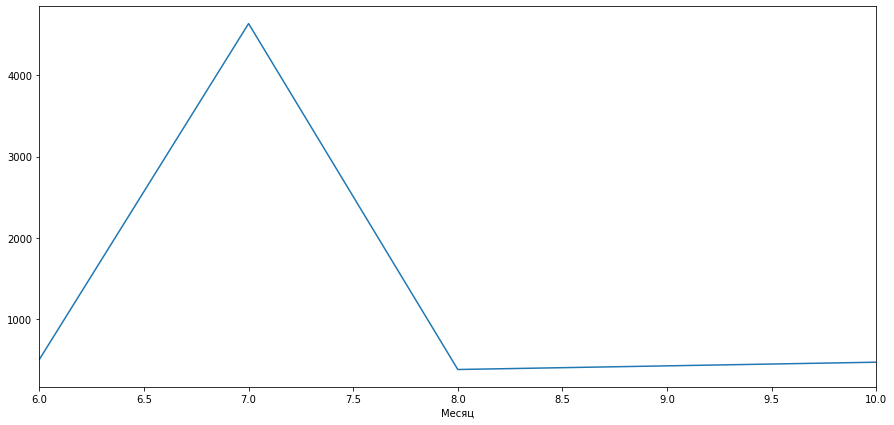

In [121]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Месяц']).sum()['Профит'].plot(ax = ax)

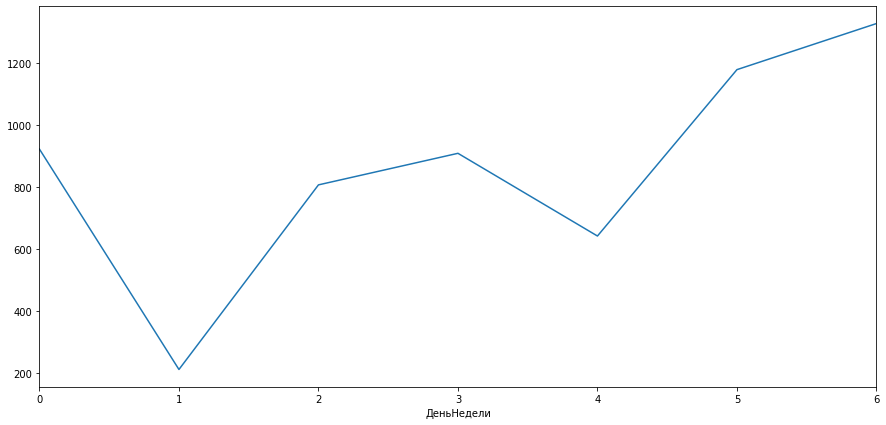

In [122]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['ДеньНедели']).sum()['Профит'].plot(ax = ax)

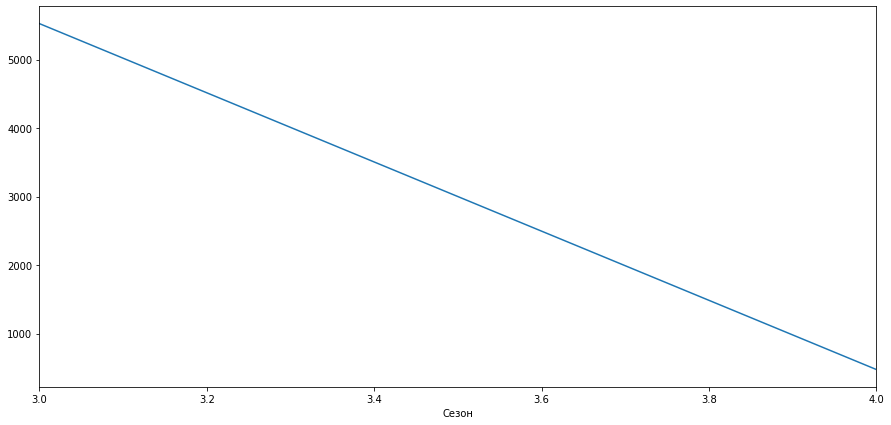

In [123]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Сезон']).sum()['Профит'].plot(ax = ax)

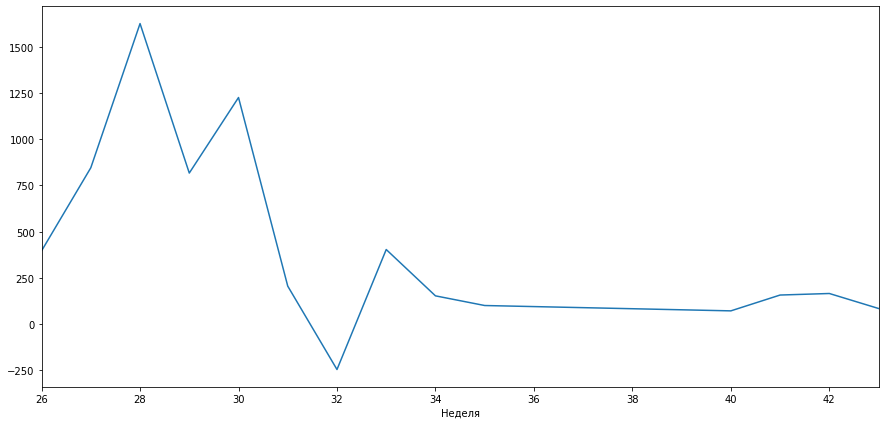

In [125]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Неделя']).sum()['Профит'].plot(ax = ax)